In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from keras.models import Sequential
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten, Dropout, BatchNormalization, LayerNormalization, TimeDistributed
#from keras.optimizers import SGD
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
import tensorflow as tf
#import talib as ta
from keras import regularizers
from sklearn.metrics import mean_squared_error
#import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import sklearn
#from keras.utils import plot_model

In [2]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_stock = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GBP_USD_M15.csv')
df_stock.head()

,Unnamed: 0,datetime,open,high,low,close,volume
0,0,2005-01-02T19:15:00.000000000Z,1.9193,1.9193,1.9193,1.9193,1
1,1,2005-01-02T19:30:00.000000000Z,1.9188,1.9197,1.9188,1.9194,11
2,2,2005-01-02T20:00:00.000000000Z,1.9191,1.9197,1.9191,1.9197,2
3,3,2005-01-02T20:30:00.000000000Z,1.9193,1.9197,1.9193,1.9197,2
4,4,2005-01-02T20:45:00.000000000Z,1.9197,1.9197,1.9185,1.9194,36


In [5]:
def price_sequence(close_price,num_days):
    X, y = [], []
    for i in range(len(close_price)-num_days):
        #Taking the 8th day as the label if the previous 7 days are features
        y.append(close_price[i+num_days])
        holder = []
        for j in range(i,i+num_days):
            holder.append(close_price[j])
        X.append(holder)
        
    return array(X), array(y)

### Using 100 historical price point

num_days = 10
n_features = 1 ##Considering only close price

X, y = price_sequence(df_stock["close"], num_days)

In [6]:
## Split into Train (80% of Dataset) and Test (20% of Dataset)
history = int(len(y)*0.8) 
X_train = np.asarray(X[:history])
X_test = np.asarray(X[history:])
y_train = np.asarray(y[:history])
y_test = np.asarray(y[history:])

In [7]:
## Delete
print("Shape of X_train: {}".format(np.shape(X_train)))
print("Shape of X_test: {}".format(np.shape(X_test)))
print("Shape of y_train: {}".format(np.shape(y_train)))
print("Shape of y_test: {}".format(np.shape(y_test)))

Shape of X_train: (302798, 10)
Shape of X_test: (75700, 10)
Shape of y_train: (302798,)
Shape of y_test: (75700,)


In [11]:

#tf.random.set_seed(0)  ### To reproduce same result

## Reshaping feature set for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features)) 
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features)) 

from tensorflow.keras import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 

layer1 = Input(shape = (num_days,n_features))
layer2 = Conv1D(filters = 70, kernel_size = 2, activation = 'relu')(layer1)
layer3 = MaxPooling1D(pool_size=1)(layer2)
layer4 = Flatten()(layer3)
layer5 = Dense(50,activation = 'relu', kernel_regularizer=regularizers.l2(0.01))(layer4)
layer6 = Dropout(0.010)(layer5)
layer7 = Dense(1)(layer6)
cnn_model = Model(inputs = layer1, outputs = layer7)
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 70)             210       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 70)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 630)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                31550     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                           

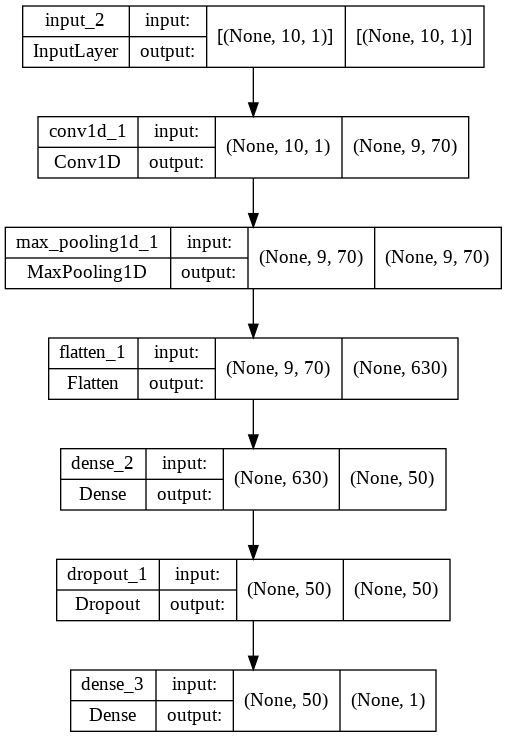

In [12]:
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
plot_model(cnn_model, to_file='Functional CNN LSTM 1D.png', show_shapes=True,show_layer_names=True)

In [13]:
## Compile and Fit
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
9463/9463 - 25s - loss: 0.0127 - val_loss: 0.0036 - 25s/epoch - 3ms/step
Epoch 2/50
9463/9463 - 26s - loss: 0.0015 - val_loss: 4.7134e-04 - 26s/epoch - 3ms/step
Epoch 3/50
9463/9463 - 26s - loss: 9.0971e-04 - val_loss: 3.9077e-04 - 26s/epoch - 3ms/step
Epoch 4/50
9463/9463 - 27s - loss: 5.7210e-04 - val_loss: 3.4198e-04 - 27s/epoch - 3ms/step
Epoch 5/50
9463/9463 - 33s - loss: 4.2922e-04 - val_loss: 4.3654e-04 - 33s/epoch - 3ms/step
Epoch 6/50
9463/9463 - 24s - loss: 3.6886e-04 - val_loss: 5.2885e-04 - 24s/epoch - 3ms/step
Epoch 7/50
9463/9463 - 26s - loss: 3.3919e-04 - val_loss: 3.2162e-04 - 26s/epoch - 3ms/step
Epoch 8/50
9463/9463 - 26s - loss: 3.2781e-04 - val_loss: 2.9409e-04 - 26s/epoch - 3ms/step
Epoch 9/50
9463/9463 - 24s - loss: 3.1248e-04 - val_loss: 3.1993e-04 - 24s/epoch - 3ms/step
Epoch 10/50
9463/9463 - 26s - loss: 3.0312e-04 - val_loss: 2.4309e-04 - 26s/epoch - 3ms/step
Epoch 11/50
9463/9463 - 24s - loss: 2.9554e-04 - val_loss: 2.8522e-04 - 24s/epoch - 3ms/ste

In [14]:
pred = cnn_model.predict(X_test)
pred = pred.flatten() ## For plotting purpose
print(pred.shape)

def rmse(y_true, y_pred):
    '''Calculates Root-mean-square deviation'''
    return mean_squared_error(y_true, y_pred, squared=False)


rmse_1d = rmse(y_test, pred)
rmse_1d

(75700,)


0.014833680534745123

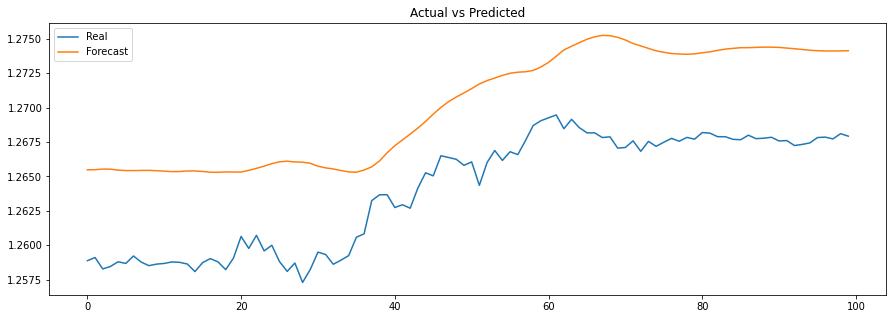

In [15]:
plt.figure(figsize=(15,5))

#plt.plot(range(len(pred)),y_test,label='Real')
#plt.plot(range(len(pred)),pred,label='Forecast')
plt.plot(range(100),y_test[:100],label='Real')
plt.plot(range(100),pred[:100],label='Forecast')
plt.title('Actual vs Predicted')
plt.legend(loc='best')
plt.show()

RNN 

In [5]:
def price_sequence(close_price,num_days):
    
    X, y = [], []
    for i in range(len(close_price)-num_days):
        #Taking the 8th day as the label if the previous 7 days are features
        y.append(close_price[i+num_days])
        holder = []
        for j in range(i,i+num_days):
            holder.append(close_price[j])
        X.append(holder)
        
    return array(X), array(y)

def unfold_data(X,y):
    
    for i in range(len(X)):
        print(X[i],y[i])
        

num_days = 5

X, y = price_sequence(df_stock["close"], num_days)
unfold_data(X,y)

Streaming output truncated to the last 5000 lines.
[1.28112 1.28064 1.2804  1.28068 1.28343] 1.28489
[1.28064 1.2804  1.28068 1.28343 1.28489] 1.28538
[1.2804  1.28068 1.28343 1.28489 1.28538] 1.2853
[1.28068 1.28343 1.28489 1.28538 1.2853 ] 1.28566
[1.28343 1.28489 1.28538 1.2853  1.28566] 1.28566
[1.28489 1.28538 1.2853  1.28566 1.28566] 1.28472
[1.28538 1.2853  1.28566 1.28566 1.28472] 1.28521
[1.2853  1.28566 1.28566 1.28472 1.28521] 1.28526
[1.28566 1.28566 1.28472 1.28521 1.28526] 1.28266
[1.28566 1.28472 1.28521 1.28526 1.28266] 1.28364
[1.28472 1.28521 1.28526 1.28266 1.28364] 1.28364
[1.28521 1.28526 1.28266 1.28364 1.28364] 1.28292
[1.28526 1.28266 1.28364 1.28364 1.28292] 1.28254
[1.28266 1.28364 1.28364 1.28292 1.28254] 1.28405
[1.28364 1.28364 1.28292 1.28254 1.28405] 1.28314
[1.28364 1.28292 1.28254 1.28405 1.28314] 1.2834
[1.28292 1.28254 1.28405 1.28314 1.2834 ] 1.28266
[1.28254 1.28405 1.28314 1.2834  1.28266] 1.2824
[1.28405 1.28314 1.2834  1.28266 1.2824 ] 1.28238
[1

In [6]:
history = int(len(y)*0.8) 
X_train = np.asarray(X[:history])
X_test = np.asarray(X[history:])
y_train = np.asarray(y[:history])
y_test = np.asarray(y[history:])


print("Shape of X_train: {}".format(np.shape(X_train)))
print("Shape of X_test: {}".format(np.shape(X_test)))
print("Shape of y_train: {}".format(np.shape(y_train)))
print("Shape of y_test: {}".format(np.shape(y_test)))

Shape of X_train: (302802, 5)
Shape of X_test: (75701, 5)
Shape of y_train: (302802,)
Shape of y_test: (75701,)


In [8]:

from tensorflow.keras import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 

#layer1 = Input(shape = (num_days,n_features))
#layer2 = Conv1D(filters = 70, kernel_size = 2, activation = 'relu')(layer1)
#layer3 = MaxPooling1D(pool_size=1)(layer2)
#layer4 = Flatten()(layer3)
#layer5 = Dense(50,activation = 'relu', kernel_regularizer=regularizers.l2(0.01))(layer4)
#layer6 = Dropout(0.010)(layer5)
#layer7 = Dense(1)(layer6)
#
n_features = 1
layer8 = Input(shape = (num_days,n_features))
layer9 = LSTM(64, activation = 'relu')(layer8)
layer10 = Dense(50,activation = 'relu')(layer9)
layer11 = Dropout(0.050)(layer10)
layer12 = Dense(70,activation = 'relu')(layer11)
layer13 = Dropout(0.050)(layer12)
layer14 = Dense(50,activation = 'relu')(layer13)
layer15 = Dense(1,activation = 'linear')(layer14)
lstm_model = Model(inputs = layer8, outputs = layer15)
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 70)                3570      
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3550  

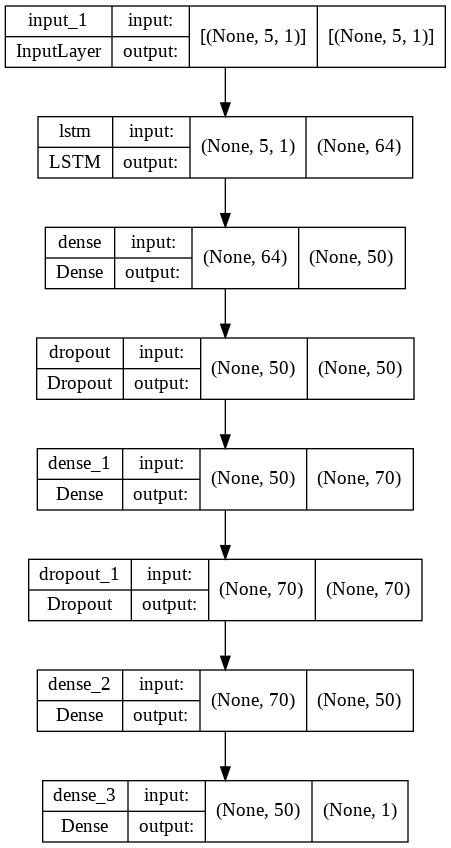

In [9]:
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
plot_model(lstm_model, to_file='Functional CNN LSTM 1D.png', show_shapes=True,show_layer_names=True)

In [10]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_test, y_test))

Epoch 1/50
9463/9463 - 31s - loss: 0.0049 - val_loss: 0.0029 - 31s/epoch - 3ms/step
Epoch 2/50
9463/9463 - 29s - loss: 1.1263e-04 - val_loss: 0.0012 - 29s/epoch - 3ms/step
Epoch 3/50
9463/9463 - 30s - loss: 4.8459e-05 - val_loss: 1.6165e-04 - 30s/epoch - 3ms/step
Epoch 4/50
9463/9463 - 29s - loss: 3.5100e-05 - val_loss: 3.7930e-04 - 29s/epoch - 3ms/step
Epoch 5/50
9463/9463 - 29s - loss: 2.9126e-05 - val_loss: 3.9737e-04 - 29s/epoch - 3ms/step
Epoch 6/50
9463/9463 - 30s - loss: 2.6778e-05 - val_loss: 1.8709e-04 - 30s/epoch - 3ms/step
Epoch 7/50
9463/9463 - 30s - loss: 2.3987e-05 - val_loss: 2.3564e-04 - 30s/epoch - 3ms/step
Epoch 8/50
9463/9463 - 30s - loss: 2.2828e-05 - val_loss: 7.7448e-05 - 30s/epoch - 3ms/step
Epoch 9/50
9463/9463 - 30s - loss: 2.1226e-05 - val_loss: 3.2495e-05 - 30s/epoch - 3ms/step
Epoch 10/50
9463/9463 - 30s - loss: 2.0186e-05 - val_loss: 2.4134e-04 - 30s/epoch - 3ms/step
Epoch 11/50
9463/9463 - 30s - loss: 1.8645e-05 - val_loss: 2.8393e-04 - 30s/epoch - 3ms/ste

In [11]:
pred = lstm_model.predict(X_test)
print(pred.shape)


RMSE= np.sqrt(mean_squared_error(y_test,pred))
RMSE

(75701, 1)


0.008908437202700426

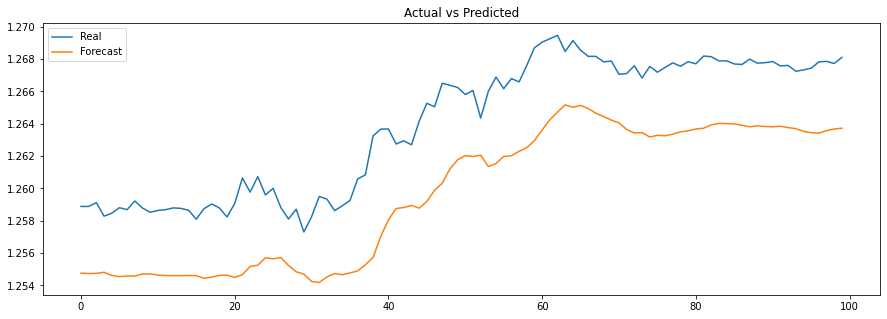

In [12]:
plt.figure(figsize=(15,5))

#plt.plot(range(len(pred)),y_test,label='Real')
#plt.plot(range(len(pred)),pred,label='Forecast')
plt.plot(range(100),y_test[:100],label='Real')
plt.plot(range(100),pred[:100],label='Forecast')
plt.title('Actual vs Predicted')
plt.legend(loc='best')
plt.show()

In [15]:
from keras.layers import GRU
layer8 = Input(shape = (num_days,n_features))
layer9 = GRU(10,  kernel_regularizer=regularizers.l2(0.01))(layer8)
layer10 = Dense(50,activation = 'relu')(layer9)
layer11 = Dropout(0.050)(layer10)
layer12 = Dense(70,activation = 'relu')(layer11)
layer13 = Dropout(0.050)(layer12)
layer14 = Dense(50,activation = 'relu')(layer13)
layer15 = Dense(1)(layer14)
gru_model = Model(inputs = layer8, outputs = layer15)
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 gru_1 (GRU)                 (None, 10)                390       
                                                                 
 dense_5 (Dense)             (None, 50)                550       
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 70)                3570      
                                                                 
 dropout_3 (Dropout)         (None, 70)                0         
                                                                 
 dense_7 (Dense)             (None, 50)                3550

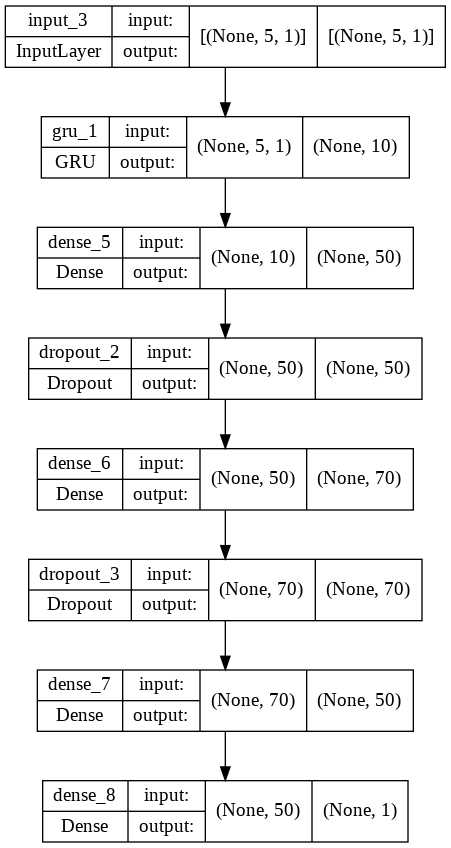

In [16]:
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
plot_model(gru_model, to_file='Functional CNN LSTM 1D.png', show_shapes=True,show_layer_names=True)

In [19]:
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_test, y_test))

Epoch 1/50
9463/9463 - 36s - loss: 8.8468e-04 - val_loss: 4.7908e-04 - 36s/epoch - 4ms/step
Epoch 2/50
9463/9463 - 28s - loss: 1.6893e-04 - val_loss: 3.7662e-04 - 28s/epoch - 3ms/step
Epoch 3/50
9463/9463 - 28s - loss: 1.1689e-04 - val_loss: 0.0012 - 28s/epoch - 3ms/step
Epoch 4/50
9463/9463 - 28s - loss: 1.0069e-04 - val_loss: 2.2326e-04 - 28s/epoch - 3ms/step
Epoch 5/50
9463/9463 - 28s - loss: 9.1390e-05 - val_loss: 3.9775e-04 - 28s/epoch - 3ms/step
Epoch 6/50
9463/9463 - 28s - loss: 8.5301e-05 - val_loss: 3.1603e-04 - 28s/epoch - 3ms/step
Epoch 7/50
9463/9463 - 29s - loss: 8.0230e-05 - val_loss: 4.4346e-04 - 29s/epoch - 3ms/step
Epoch 8/50
9463/9463 - 28s - loss: 7.6960e-05 - val_loss: 1.6649e-04 - 28s/epoch - 3ms/step
Epoch 9/50
9463/9463 - 32s - loss: 7.2549e-05 - val_loss: 1.5475e-04 - 32s/epoch - 3ms/step
Epoch 10/50
9463/9463 - 28s - loss: 6.9026e-05 - val_loss: 2.5538e-04 - 28s/epoch - 3ms/step
Epoch 11/50
9463/9463 - 28s - loss: 6.7585e-05 - val_loss: 1.9285e-04 - 28s/epoch -

In [20]:
pred = gru_model.predict(X_test)
pred = pred.flatten() ## For plotting purpose
print(pred.shape)

def rmse(y_true, y_pred):
    '''Calculates Root-mean-square deviation'''
    return mean_squared_error(y_true, y_pred, squared=False)


rmse_1d = rmse(y_test, pred)
rmse_1d

(75701,)


0.007461558133722357

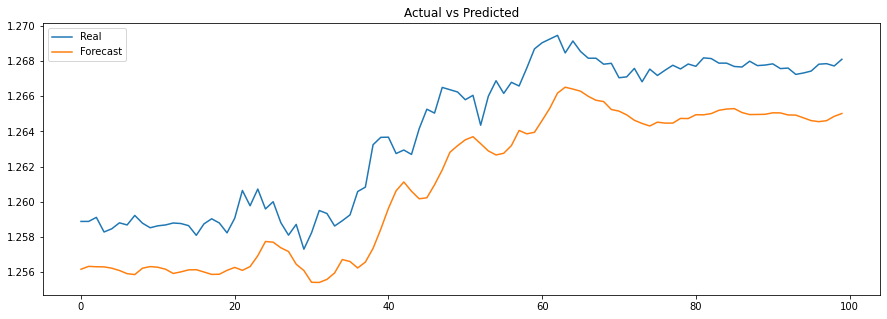

In [21]:
plt.figure(figsize=(15,5))

#plt.plot(range(len(pred)),y_test,label='Real')
#plt.plot(range(len(pred)),pred,label='Forecast')
plt.plot(range(100),y_test[:100],label='Real')
plt.plot(range(100),pred[:100],label='Forecast')
plt.title('Actual vs Predicted')
plt.legend(loc='best')
plt.show()